# keras_vggface Implementation:
https://github.com/rcmalli/keras-vggface

# Oxford VGG_Face:
http://www.robots.ox.ac.uk/~vgg/software/vgg_face/

In [1]:
import numpy as np
import keras
from keras.preprocessing import image
from deeputil.modelassist import KerasModelHelper
from deeputil.keras_vggface import vggface

Using TensorFlow backend.


In [2]:
# tensorflow
model = vggface.VGGFace()

In [3]:
assert isinstance(model, keras.engine.training.Model)

In [4]:
KerasModelHelper.get_model_layers_details_all(model)

Total 26 layers details are collected.


,Id,LayerName,Type,Filters,InputShape,OutputShape,Activation,ParameterCount
0,0,input_1,InputLayer,0,"(None, 224, 224, 3)","(None, 224, 224, 3)",None,0
1,1,conv1_1,Conv2D,64,"(None, 224, 224, 3)","(None, 224, 224, 64)",relu,1792
2,2,conv1_2,Conv2D,64,"(None, 224, 224, 64)","(None, 224, 224, 64)",relu,36928
3,3,pool1,MaxPooling2D,0,"(None, 224, 224, 64)","(None, 112, 112, 64)",None,0
4,4,conv2_1,Conv2D,128,"(None, 112, 112, 64)","(None, 112, 112, 128)",relu,73856
5,5,conv2_2,Conv2D,128,"(None, 112, 112, 128)","(None, 112, 112, 128)",relu,147584
6,6,pool2,MaxPooling2D,0,"(None, 112, 112, 128)","(None, 56, 56, 128)",None,0
7,7,conv3_1,Conv2D,256,"(None, 56, 56, 128)","(None, 56, 56, 256)",relu,295168
8,8,conv3_2,Conv2D,256,"(None, 56, 56, 256)","(None, 56, 56, 256)",relu,590080
9,9,conv3_3,Conv2D,256,"(None, 56, 56, 256)","(None, 56, 56, 256)",relu,590080


In [5]:
img_url = "/Users/avkashchauhan/Downloads/Donald-Trump.jpg"
#img_url = "/Users/avkashchauhan/Downloads/goldfish.jpg"
#img_url = "/Users/avkashchauhan/Downloads/Avkash-With-Mug.png"

In [6]:
from deeputil.imageassist import ImageUtils

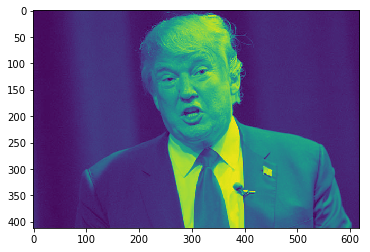

In [7]:
ImageUtils.display_image_from_disk(img_url, show_info=False)

In [8]:
img = image.load_img(img_url, target_size=(224, 224))

In [9]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# TF order aka 'channel-last'
x = x[:, :, :, ::-1]
# TH order aka 'channel-first'
# x = x[:, ::-1, :, :]
# Zero-center by mean pixel
x[:, 0, :, :] -= 93.5940
x[:, 1, :, :] -= 104.7624
x[:, 2, :, :] -= 129.1863

preds = model.predict(x)
print('Predicted:', np.argmax(preds[0]))

Predicted: 176


In [10]:
KerasModelHelper.get_feature_map_counts_for_all_layers(model, x)

Now collecting feature maps for all layers in the given model..
Feature maps for all layers are collected.


,LayerId,FeatureMapCount
0,0,3
1,1,64
2,2,64
3,3,64
4,4,128
5,5,128
6,6,128
7,7,256
8,8,256
9,9,256


Now collecting feature map for the selected layer in the given model..
Now displaying 256 feature maps for the selected layer in the given model..
Plotting 16 feature maps in each row.


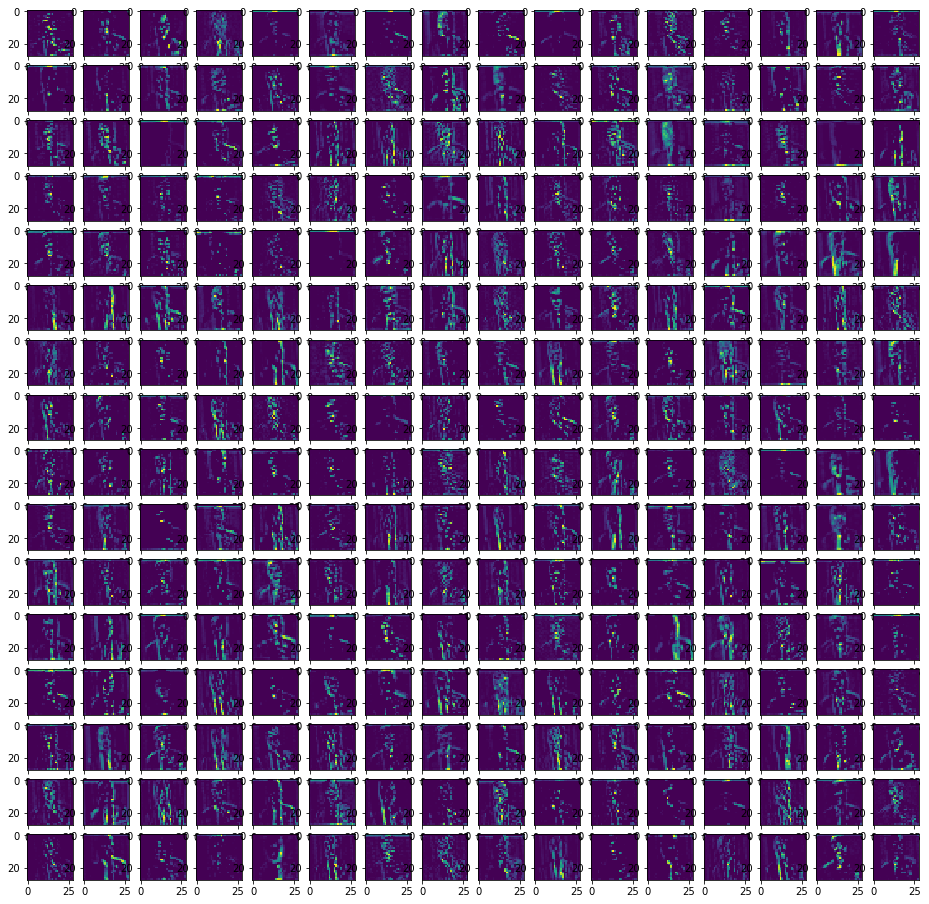

You are watching total 256 features from layer #10.


In [11]:
KerasModelHelper.display_full_feature_map_for_selected_layer_in_model(model, 10, x)

In [ ]:
KerasModelHelper.display_individual_feature_for_selected_layer_in_model(model, 10, 10, x)